# Análisis de Componentes Principales (PCA por sus siglas en inglés)

El PCA no es exactamente un modelo de aprendizaje de máquina completo. En vez, es un algoritmo de aprendizaje supervisado.

El PCA es simplemente la transformación de los datos e intenta encontrar qué variables (features) explican la mayor parte de la varianza de los datos, por ejemplo:


<img src='PCA.png' />


## Importación de librerías a utilizar


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Los Datos

Trabajaremos con un conjunto de datos sobre Cancer que tiene una gran cantidad de variables.

El sklearn contiene otros conjuntos de datos. Si quisieran ver qué tiene, pueden escribir:

**from sklearn.datasets import load\_** y luego darle un tabulador.


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()  # Hay que colocarlo en una variable

Qué tipo de dato es este?


In [6]:
type(cancer)  # Ver que tipo es. Es como un diccionario

sklearn.utils._bunch.Bunch

Ciertamente es un tipo de dato que no conocemos, pero se puede trabajar, en parte, como que fuera un diccionario


In [8]:
cancer.keys()  # Para encontrar las llaves del diccionario

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Si tratamos de ver cada uno de estos:


In [9]:
cancer["DESCR"]

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

Sale algo no muy ordenado...se visualiza mejor con un print()


In [10]:
print(
    cancer["DESCR"]
)  # instancias es cuantas observaciones tiene y el número de atributos es la cantidad de variables

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [11]:
df = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
# (['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualización del PCA

Es muy difícil visualizar datos de alta dimensionalidad (gran número de variables), podemos utilizar el PCA para encontrar un número deseado de componentes principales (para nuestro ejemplo buscaremos dos). Habiendo reducido los datos a este espacio nuevo de dos dimensiones, es posible representarlos por medio de una gráfica de dispersión. Sin embargo, antes de hacer esto, necesitamos escalar...o normalizar...los datos para que cada componente tenga una varianza unitaria.

Hay que normalizar los datos


In [13]:
from sklearn.preprocessing import StandardScaler

### Creamos un objeto de la clase StandardScaler y lo ajustamos a los datos


In [15]:
escalador = StandardScaler()  # Instanciar la clase
escalador.fit(df)  # Entrenarlo y ajustarlo a nuestro datos

StandardScaler()

Hemos entrenado el objeto escalador.


### Ahora transformaremos los datos


In [17]:
datos_escalados = escalador.transform(df)

El PCA con Scikit Learn utiliza un proceso similar a otras funciones de pre-procesamiento que vienen con SciKit Learn. Instanciamos un objeto PCA, encontramos los componentes principales usando el método "fit" y luego aplicamos la rotación y reducción de dimensiones por medio de una llamada a "transform()".

También podemos especificar cuántos componentes deseamos conservar al crear el objeto PCA.


In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(
    n_components=2
)  # instaciamos un valor de la clase PCA, el parámetro obligatorio en cuentos componentes queremos descomponer los datos (cuantos ejes)

In [20]:
pca.fit(datos_escalados)  # entrenar con los datos normalizados el PCA

PCA(n_components=2)

Ahora podemos transformar los datos a los primeros 2 componentes principales.


In [21]:
x_pca = pca.transform(datos_escalados)  # Hay que transformar los datos

Veamos qué ocurrió acá:

La forma de los datos originales (normalizados) es:


In [22]:
datos_escalados.shape

(569, 30)

La forma de los datos ya convertidos a componentes principales es:


In [23]:
x_pca.shape

(569, 2)

Excelente ... redujimos 30 dimensiones a solo 2!

Grafiquémoslos!


Text(0, 0.5, 'Segundo componente principal')

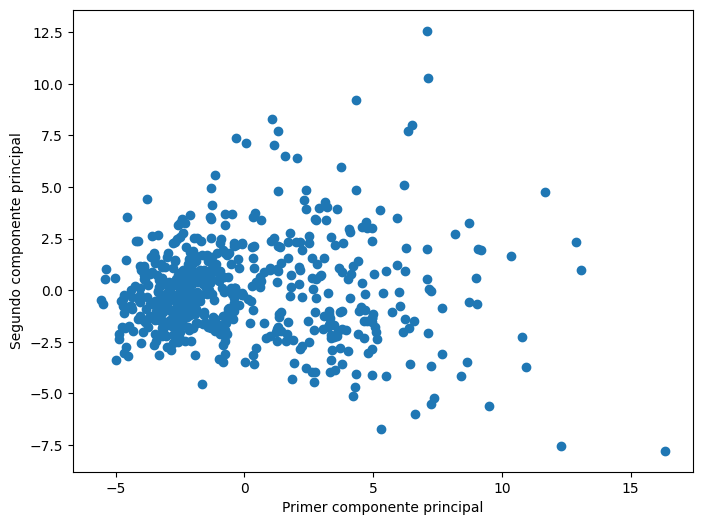

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.xlabel("Primer componente principal")
plt.ylabel("Segundo componente principal")

### Solo así no vemos mucho!

No tenemos idea de qué hay en los componentes.

Pero veamos qué pasa agregando información de los datos meta, y un poco de color


Text(0, 0.5, 'Segundo componente principal')

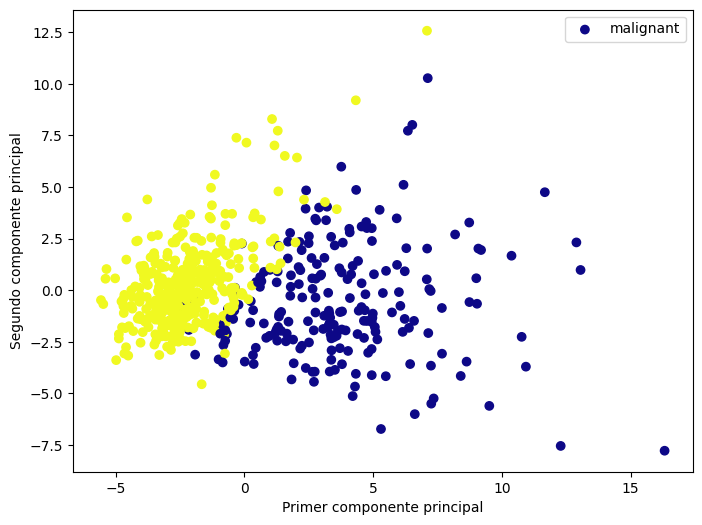

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(
    x_pca[:, 0], x_pca[:, 1], c=cancer["target"], cmap="plasma"
)  # grafica de dispersión
plt.legend(cancer["target_names"], loc="upper right")
plt.xlabel("Primer componente principal")
plt.ylabel("Segundo componente principal")

Claramente al utilizar estos dos componentes, fácilmente podemos separar las dos clases (Malignos y Benignos)

## Interpretación de los componentes

Desafortunadamente, con esta gran potencia de reducción dimensional, viene el costo de poder comprender fácilmente qué es lo que representan estos componentes.

Los componentes corresponden a combinaciones de las variables originales, los componentes mismos se almacenan como un attributo del objeto PCA ajustado:


In [26]:
pca.components_  # Nos permite encontrar un arreglo con dos listas
# La primera lista son los componentes pricipales

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

En este arreglo numpy, cada fila representa un componente principal, y cada columna relaciona a las variables originales. Podemos visualizar esta relación con un mapa de calor:


In [27]:
df_componentes = pd.DataFrame(pca.components_, columns=cancer["feature_names"])
df_componentes

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<Axes: >

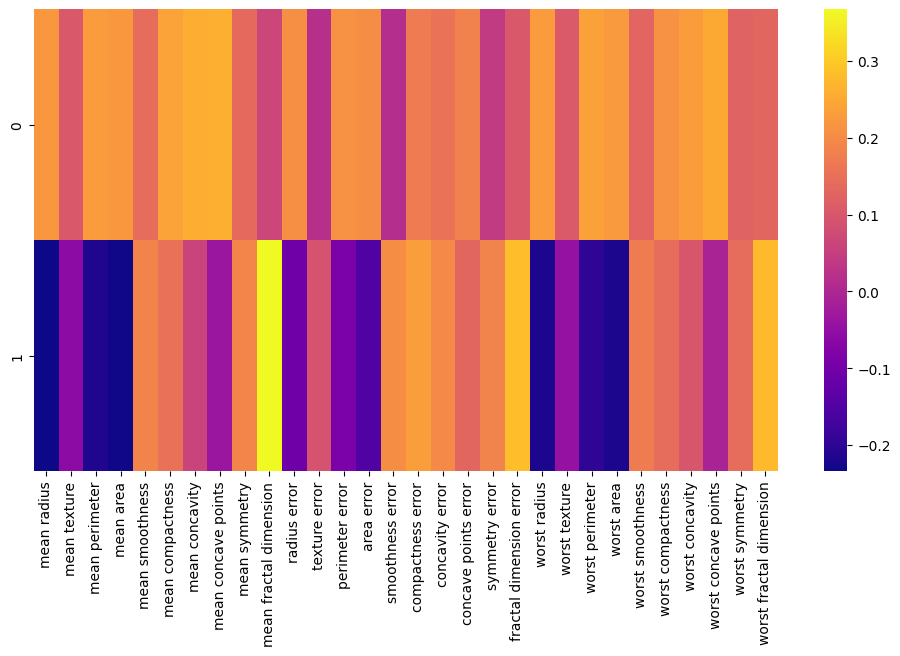

In [29]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    df_componentes,
    cmap="plasma",
)  # probar con cmap = "plasma", para otros colores

Este mapa de calor y la barra de colores básicamente representan la correlación entre las diferentes variables y los componentes principales.

## Conclusión

De nuevo, el PCA por sí solo solamente es un algoritmo para reducir la dimensionalidad de los conjuntos de datos. Los más probable es que luego se querrán alimentar estos datos a un modelo de clasificación.
